# Защита персональных данных клиентов

## Содержание
1. Загрузка данных
2. Умножение матриц
3. Алгоритм преобразования
4. Проверка алгоритма

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1 Загрузка данных

In [1]:
import pandas as pd 
from IPython.display import display #импортируем метод дисплей для красивого вывода таблиц (не применяя print)
pd.set_option('display.max_columns', None) #реализуем возможность вывода всех столбцов на экран
pd.set_option('display.float_format', '{:.3f}'.format) #выаодим значения float до 3 знаков после запятой


import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression # линейная регрессия

from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('insurance.csv', sep=',')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.499,30.953,39916.360,1.194,0.148
std,0.500,8.441,9900.084,1.091,0.463
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33300.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


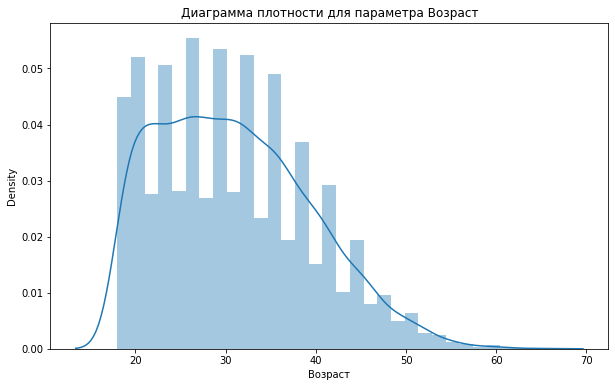

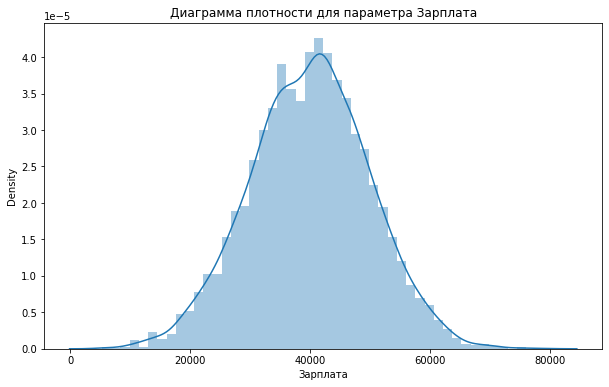

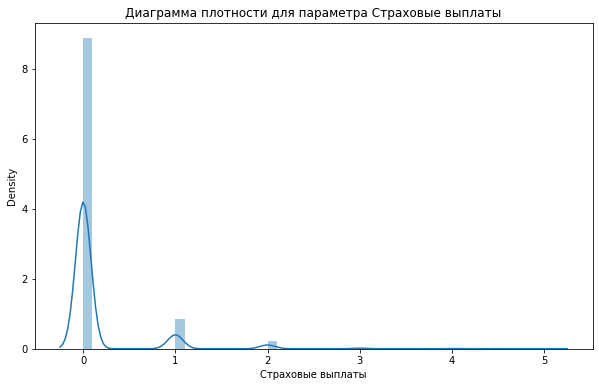

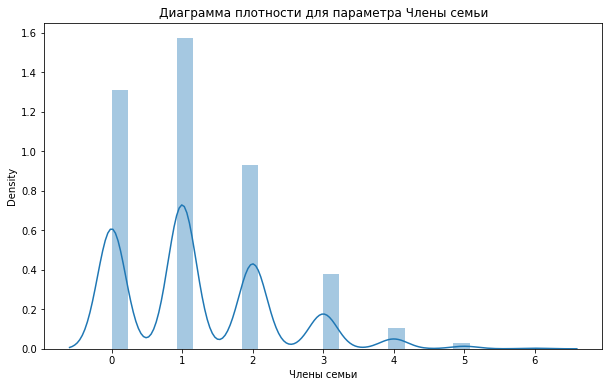

In [5]:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for col in columns:
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])
    plt.title(f'Диаграмма плотности для параметра {col}')

    plt.show()

In [6]:
data.duplicated().sum() # проверим на дубликаты

153

Удалим дубликаты.

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

Проверим датасет на мультиколениарность.

<AxesSubplot:>

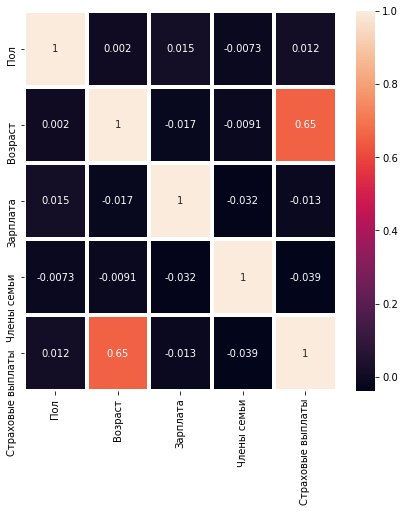

In [8]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(data.corr(), annot=True, linewidths=3, linecolor='white')

Матрица корреляций не выявила значительных зависимостей между обучающими признаками.

Вывод основных характеристик и параметров показал, что:
1. Все данные в датасете заполнены (пропусков нет).
2. Типы данных изменений не требуют.
3. Значительных выбросов и аномальных значений не выявлено.
4. Выявлены и удалены дубликаты.

Т.о. предобработки данных не требуется, можно переходить к следующему шагу.

## 2 Умножение матриц

**Вопрос:** *признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?*

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:**

1. Для обоснования ответа получим предсказания для домноженных признаков. Пусть наши признаки будут как в исходном датасете размерностью 5000 на 4, а матрица для домножения 4 на 4. Умноженная матрица будет иметь вид X * P. Тогда фомула предсказаний примет следующий вид:

$$a' = XPw'$$

2. Подставим в формулу предсказаний формулу обучения для матрицы X P:

$$a' = XP((XP)^T XP)^{-1}(XP)^Ty$$

Воспользуемся следующими свойствами матриц:


$$(A B)^{-1} =B^{-1} A^{-1}$$

$$(A B)^{T} =B^{T} A^{T}$$

$$A A^{-1}=E$$

$$A E=E A=A$$

3. Раскроем скобки с транспонированием матриц, получится следующее уравнение:

$$a' = XP(P^T X^T XP)^{-1}P^T X^Ty$$

Внутри скобок, от множителей которых берется обратная матрица остались следующие матрицы: $P^T$ размером 4х4, $X^T$ размером 4х5000, $X$ размером 5000x4, $P$ размером 4x4. Одно из дополнительных свойств матриц, о котором следует помнить слудующее $ A(BC) = (AB)C$. Оно позволяет группировать матрицы внутри произведения различным образом. Т.к. обратная матрица может браться только от квадратной матрицы, то для раскрытия скобок данного произведения нам надо сгруппировать его множители так, чтобы они были квадратными матрицами.

4. Выделим 2 множителя произведения $P^T X^T X$ и $P$ и раскроем скобки:

$$a' = X P P^{-1} (P^T X^T X)^{-1} P^T X^Ty$$

5. Выделим внутри оставшихся скобок множители $P^T$ и $X^T X$ и раскроем скобки:

$$a' = X P P^{-1} (X^T X)^{-1}(P^T)^{-1} P^T X^Ty$$

6. Произведения $P P^{-1}$ и $(P^T)^{-1} P^T$ дают единичные матрицы, которые можно исключить из уровнения. С учетом этого формула принимает вид:

$$a' = X (X^T X)^{-1} X^Ty$$

Не сложно заметить, что произведение $(X^T X)^{-1} X^Ty$ равно $w$, тогда:

$$a' = X w$$

Таким образом, мы получили аналогичную формулу предсказаний, что и была в начале, значит домножение признаков на обратимую матрицу не влияет на предсказания модели.

## 3 Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу P размером 4х4. Создадим модель линейной регрессии до преобразования и посчитаем метрику R2. Далее умножим исходные признаки на обратимую матрицу и на основе полученных значений вновь посчитаем метрику R2. Метрики R2 по итогу должны быть равны.

**Обоснование**

Как было показано в предыдущем пункте, домножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны.

## 4 Проверка алгоритма

Подготовим необходимые признаки: обучающие признаки исходные, целевой признак, матрицу для умножения, обучающие признаки после умножения. После подготовки признаков проведем машинное обучение с помощью алгоритма линейной регрессии для признаков до умножения и после. Сделаем в каждом случае предсказания и определим метрики r2.

In [9]:
# создадим признаки для исходного состояния
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
display(features.head())
display(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.000,49600.000,1
1,0,46.000,38000.000,1
2,0,29.000,21000.000,0
3,0,21.000,41700.000,2
4,1,28.000,26100.000,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

In [10]:
# проведем модлеирование
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2 для признаков в исходном состоянии равняется {r2}')

Метрика R2 для признаков в исходном состоянии равняется 0.4302010044852067


Далее необходимо создать обратимую матрицу размером 4 на 4. При этом достаточно важным является не создать случайной необратимую матрицу, т.к. это нарушит наш алгоритм. **По одной из теорем обратных матриц**: для существования обратной матрицы $A^{-1}$ необходимо и достаточно, чтобы матрица $A$ была невырожденной, то есть, чтобы ее определитель не был равен нулю. Заложим проверку данного условия при создании обратимой матрицы.

In [11]:
det = 0 # задали исходную точку определителя
P = 0
while det == 0:
    P = np.random.normal(size=(4, 4))
    det = np.linalg.det(P)
P

array([[ 1.8471524 , -1.42434757, -0.33440987,  0.66291971],
       [ 1.88303411, -0.62759197, -1.43028209, -0.70103223],
       [-2.1114973 ,  0.96230165, -0.48919883,  1.81660677],
       [ 0.97659323,  1.371425  ,  0.21674894,  0.21665623]])

Матрица обратима, умножим исходные признаки на нашу матрицу.

In [12]:
features_multi = features @ P
features_multi.head()

,0,1,2,3
0,-104650.238,47704.377,-24323.021,90075.833
1,-80149.301,36539.965,-18655.132,68999.027
2,-44286.835,20190.134,-10314.654,38128.412
3,-88007.940,40117.542,-20429.194,75738.214
4,-55055.507,25097.076,-12808.472,47394.471


Произведем моделирование на измененных признаках.

In [13]:
model_2 = LinearRegression()
model_2.fit(features_multi, target)
predictions = model_2.predict(features_multi)
r2_multi = r2_score(target, predictions)
print(f'Метрика R2 для признаков в умноженном состоянии равняется {r2_multi}')

Метрика R2 для признаков в умноженном состоянии равняется 0.4302010044852017


**Метрики R2 обеих моделей одиннаковые, следовательно умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования.**